## Image dataframe creation and text storage in mongodb

### Load images from directory and store path along with index in dataframe

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import pickle
from PIL import Image
import json

%matplotlib inline

In [65]:
def read_image(path):
    img = cv2.imread(path)
    if img is None:
        raise IOError("Unable to open '%s'. Are you sure it's a valid image path?")
    return img

In [66]:
def image_path(folder_name, image_suffix='*.jpg'):
    """Simply return list of paths for all images in images dataset."""
    return [(i, path) for i, path in enumerate (glob.glob(folder_name + '/*'+ image_suffix))]

In [67]:
image_df = pd.DataFrame(image_path('/home/ubuntu/kojak/full/', image_suffix='*.jpg'), columns=['index', 'image_path'])

In [68]:
image_df.shape

(11962, 2)

In [69]:
#pickle dataframe
image_df.to_pickle('image_df.pickle')

In [70]:
image_df.head()

,index,image_path
0,0,/home/ubuntu/kojak/full/d6da45fb45fe6402fa3a11...
1,1,/home/ubuntu/kojak/full/ebf48a1ee869840c6d4940...
2,2,/home/ubuntu/kojak/full/0a166639abb62e83ef90a2...
3,3,/home/ubuntu/kojak/full/3d6dae5bd0b36e1110d288...
4,4,/home/ubuntu/kojak/full/009ba35f1a37db697ea9d9...


In [97]:
#View image size
filepath = image_df.iloc[9088]['image_path']
im=Image.open(filepath)
im.size # (width,height) tuple
#All perfume sizes are 300x300

(300, 300)

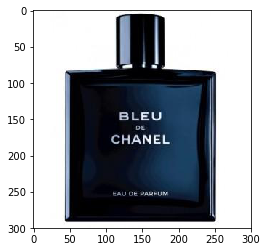

In [98]:
#View image
plt.imshow(im)

### Store text in mongodb

In [ ]:
from pymongo import MongoClient
client = MongoClient('ec2-34-198-166-162.compute-1.amazonaws.com', 27017)
db = client.perfume_data

In [ ]:
client.database_names()

In [ ]:
#Upload posts information into mongodb
perfume_content = client.perfume_data.perfume_content
bulk = perfume_content.initialize_ordered_bulk_op()
with open("perfumedetails.json", "r") as jsonFile:
    data = json.load(jsonFile)       
for item in data:
    bulk.insert(item)
jsonFile.close()
    
bulk.execute()